In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress as lin_reg
from scipy.optimize import leastsq, curve_fit


%matplotlib inline

def get_data(data):
    names = list(data.columns.values)
    res = [np.array(data[names[i]]) for i in range(len(names))]
    return res

def linear_fit(x,y, pri = 0):
    p, V = np.polyfit(x, y, 1, cov=True)
    
    if pri:
        print "k: {} +/- {}".format(p[0], np.sqrt(V[0][0]))
        print "b: {} +/- {}".format(p[1], np.sqrt(V[1][1]))
    
    return p[0],p[1],np.sqrt(V[0][0]),np.sqrt(V[1][1])

def yoba_fit(x,y,yerr,pri=0):
    sigma = yerr/y
    ans = curve_fit(lambda x, a, b: a*x+b, x, y, sigma=sigma)
    p = ans[0]
    V = ans[1]
    
    k = p[0]
    b = p[1]
    kerr = np.sqrt(V[0][0])
    berr = np.sqrt(V[1][1])
    if pri:
        print "k: {} +/- {}".format(p[0], np.sqrt(V[0][0]))
        print "b: {} +/- {}".format(p[1], np.sqrt(V[1][1]))

    return k,b,kerr,berr
    
def a_del_b(a,b,aerr,berr):
    c = a/b
    cerr = c*np.sqrt((aerr/a)**2+(berr/b)**2)
    return [c, abs(cerr)]

def a_mul_b(a,b,aerr,berr):
    c = a*b
    cerr = c*np.sqrt((aerr/a)**2+(berr/b)**2)
    return c, abs(cerr)

###
data = pd.read_csv('1.csv')

m = 9.10938356*10**-31
c = 299792458
k = 1.6021766208*10**-19

mc2_kev = 0.5109989461*10**3
mc2_kev

N_f = 0.9398
N_ferr = 0.097


data.columns = [r'$N$',r'$P$']
data[r'$\sigma_N$'] = np.sqrt(data[r'$N$'])/(np.sqrt(100))

Построим график зависимости $N(p)$ по измеренным данным и найдем погрешность измерения импульса:

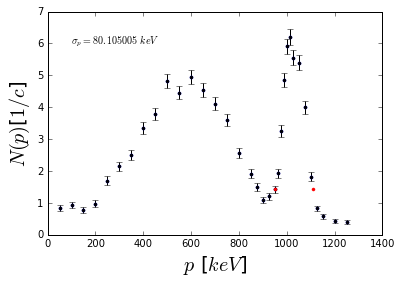

In [2]:
x = data['$P$'].values
y = data['$N$'].values
yerr = data['$\sigma_N$'].values
plt.plot(x,y,'.')
plt.errorbar(x=x,y=y,yerr=yerr, fmt='k.')

k = (0.825-1.824)/(1126.1-1101.1)
b = 1.824-k*1101.1
x0 = (1.424-b)/k

x1 = [950.9, x0]#(1126.1+1101.1)/2]
y1 = [1.424, 1.424]#(0.825+1.824)/2]

perr = (x1[1]-x1[0])/2
plt.plot(x1,y1,'r.')
plt.ylabel(r'$N(p)$'+'['+'$1/c}$'+']', fontsize=20)
plt.xlabel(r'$p$'+r' [$keV$]', fontsize=20)
plt.text(100,6,r'$\sigma_p=%f$'%(perr)+r' $keV$')
plt.show()

In [3]:
data['$\sigma_P$'] = perr

Вычислим необходимые величины: $\sqrt{N(p)}/p \text{ и } E$, учитывая фон. $N_f=0.9398 \pm 0.097$

In [4]:
data[r'$N-N_f$'] = data[r'$N$']-N_f
data[r'$\sigma_{N-N_f}$'] = data['$\sigma_N$']+N_ferr

data[r'$\sqrt{N(p)}/p$'] = np.sqrt(data[r'$N-N_f$'])/data['$P$'] #c*np.sqrt((aerr/a)**2+(berr/b)**2)
data[r'$\sigma_{\sqrt{N(p)}/p}$'] = data[r'$\sqrt{N(p)}/p$']*\
np.sqrt((data['$\sigma_{N-N_f}$']/np.sqrt(2)/np.sqrt(data['$N-N_f$']))**2+\
        (data['$\sigma_P$']/data['$P$'])**2)

data[r'$E$'] = np.sqrt(data['$P$']**2+mc2_kev**2)-mc2_kev
data['$\sigma_E$'] = data['$\sigma_P$']*data['$P$']/(np.sqrt(data['$P$']**2+mc2_kev**2))

data = data.dropna()

data

,$N$,$P$,$\sigma_N$,$\sigma_P$,$N-N_f$,$\sigma_{N-N_f}$,$\sqrt{N(p)}/p$,$\sigma_{\sqrt{N(p)}/p}$,$E$,$\sigma_E$
1,0.940,100.1,0.096954,80.105005,0.0002,0.193954,0.000141,0.001375,9.712042,15.399158
3,0.980,200.2,0.098995,80.105005,0.0402,0.195995,0.001001,0.000800,37.817929,29.221080
4,1.699,250.2,0.130346,80.105005,0.7592,0.227346,0.003482,0.001287,57.964992,35.225910
5,2.149,300.3,0.146595,80.105005,1.2092,0.243595,0.003662,0.001133,81.706725,40.585967
6,2.512,350.3,0.158493,80.105005,1.5722,0.255493,0.003579,0.000967,108.541216,45.292920
7,3.349,400.4,0.183003,80.105005,2.4092,0.280003,0.003877,0.000920,138.185221,49.406695
8,3.786,450.4,0.194576,80.105005,2.8462,0.291576,0.003746,0.000808,170.161889,52.967365
9,4.836,500.5,0.219909,80.105005,3.8962,0.316909,0.003944,0.000774,204.277345,56.051844
10,4.461,550.5,0.211211,80.105005,3.5212,0.308211,0.003409,0.000635,240.113677,58.709978
11,4.961,600.6,0.222733,80.105005,4.0212,0.319733,0.003339,0.000583,277.569556,61.010636


Построим график зависимости $\sqrt{N(p)}/p$ от $E$:

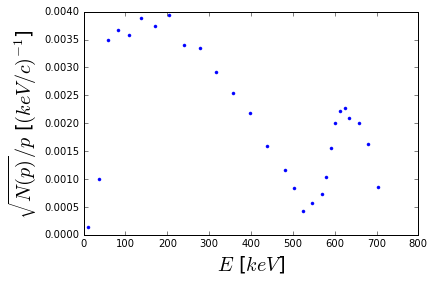

In [5]:
x = data['$E$'].values
y = data['$\sqrt{N(p)}/p$'].values
xerr = data['$\sigma_E$'].values
yerr = data['$\sigma_{\sqrt{N(p)}/p}$'] 
plt.plot(x,y,'.')
#plt.errorbar(x=x,y=y,yerr=yerr, xerr=xerr, fmt='k.')

plt.ylabel(r'$\sqrt{N(p)}/p$'+' ['+'$(keV/c)^{-1}$'+']', fontsize=20)
plt.xlabel(r'$E$'+r' [$keV$]', fontsize=20)
#plt.legend(['6030nm','5852nm'])

Из графика видно, что нас интересует диапазон значений $200<E<500$. Построим график в этом диапазоне, апроксимируем его прямой и найдем точку пересечения с осью $OX$:

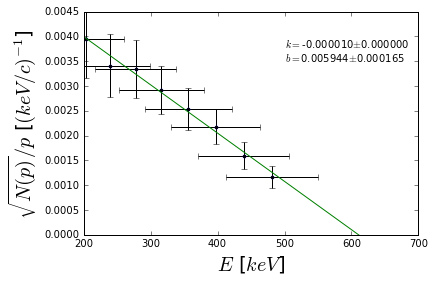

In [6]:
d = np.array([[i,j,k,l] for i,j,k,l in zip(x,y,xerr,yerr) if 200<i<500])
x = np.array([i[0] for i in d])
y = np.array([i[1] for i in d])
xerr = np.array([i[2] for i in d])
yerr = np.array([i[3] for i in d])

plt.plot(x,y,'.')
plt.errorbar(x=x,y=y,yerr=yerr, xerr=xerr, fmt='k.')

k,b,kerr,berr = yoba_fit(x,y,yerr,pri = 0)
z = np.linspace(200,700,10)
plt.plot(z,z*k+b)
plt.axis([200,700,0,0.0045])

plt.text(500,0.0035,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))

plt.ylabel(r'$\sqrt{N(p)}/p$'+' ['+'$(keV/c)^{-1}$'+']', fontsize=20)
plt.xlabel(r'$E$'+r' [$keV$]', fontsize=20)

In [7]:
E_e, E_eerr = a_del_b(-b,k,berr,kerr)
print E_e,E_eerr
print np.sqrt(1013.5**2+mc2_kev**2)-mc2_kev

610.645872781 33.9541952456
624.03505027


Получим значение искомое значение максимальной энергии $\beta$ спектра $E_e = 610.6459 \pm 33.9542$ $keV$.